## Getting started

After installation of scSELpy, lets load scSELpy as scS. scSELpy does not use dependencies that scanpy does not use, if scanpy runs fine on your system, scSELpy should also work.

In [2]:
 
#If plots are not being shown on Jupyter Notebook, try using:
#%matplotlib inline
#Do not use it on ipython.

import scanpy as sc 
import scselpy as scS 
adata = scS.generate.adata()

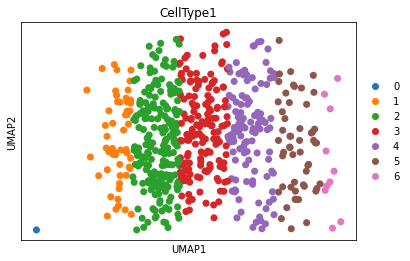

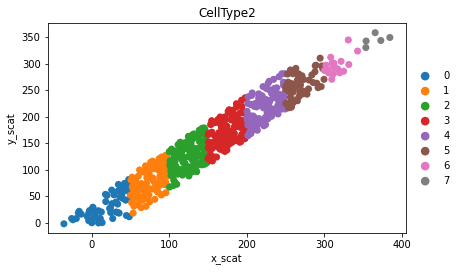

In [3]:
sc.pl.umap(adata,color='CellType1')
sc.pl.scatter(adata,"x_scat","y_scat",color='CellType2') #in scatter plot, x_scat and y_scat could be e.g. n_genes and n_counts in a real anndata object.

## Selecting cells on UMAP

We will now select our cells using scSELpy.
### Some tips before:
Left click to select.<br>
Middle button to erase last selected point.<br>
Right click once when you are done selecting.<br>
Right click twice when you want to exit. <b>Do not use the X(cross)</b> in the top right corner to exit.

### Running scSELpy
Lets run scSELpy. Since we imported scSELpy as scS, we can basically copy paste the code of scanpy imported as sc, and change sc to scS.

A window should popup, in which you can select your cells. Left click a few times on the plot, afterwards right click two times to exit. 

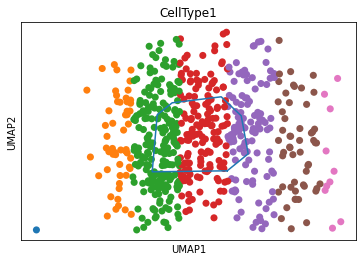

In [4]:
scS.pl.umap(adata,color="CellType1")#,helpbox=True 

## Ploting selected cells

The selected cells are annotated and stored as ```Anndata observations```. By default, it is stored as REMAP_1. The second time your run scSELpy, it will be stored as REMAP_2 and so on. If scSELpy.settings.verbosity is atleast 2 (2 by default), the stored observation name will be output after it is added by scSELpy.

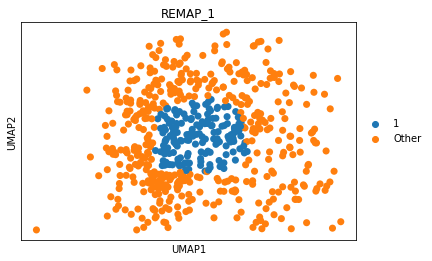

In [5]:
sc.pl.umap(adata,color="REMAP_1")

Lets say we are only interested in our select cells, we can remove the other cells.

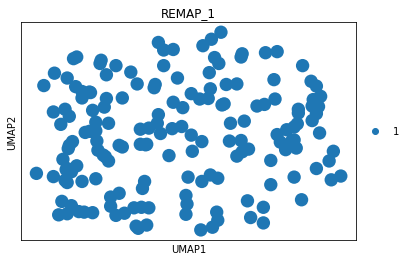

In [6]:
adata_selected = adata[adata.obs["REMAP_1"] != "Other"]
sc.pl.umap(adata_selected,color="REMAP_1")

Or the inverse, only keep other.

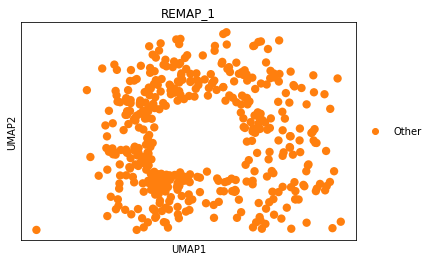

In [7]:
adata_unselected = adata[adata.obs["REMAP_1"] == "Other"]#Lets say we are only interested in our select cells, we can remove the other cells.
sc.pl.umap(adata_unselected,color="REMAP_1")

Replot the selection with the CellTypes as background. 

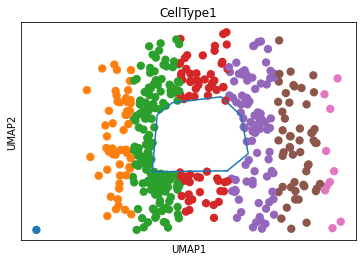

In [8]:
scS.pl.umap(adata_unselected,color="CellType1",replot_lines="REMAP_1")

The coordinates of the polygons are stored in ```Anndata Unstructured annotation```. By running adata.uns, we can see the coordinates of the polygon. Alternatively, we can run scSELpy.pl.umap(adata,printcords=True), to print the coordinates of the polygon. These coordinates can be added to the mock parameter, to automatically redraw the polygons. More on the mock parameter in the ```Mock toturial```.

## Selecting cells on Scatter plots.

Besides UMAP, we can also select on PCA, TSNE and Scatter plots. It is basically all the same. Here we demonstrate the cell selection on Scatter plots. 

This time, lets make multiple overlapping selections. 
After you made your selection with left click, right click once and make a new selection with left click. After you are done, right click twice

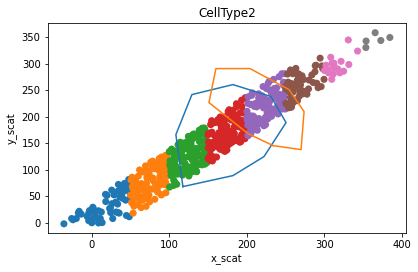

In [9]:
scS.pl.scatter(adata,"x_scat","y_scat",color='CellType2') 

For the consequetive scatter plot, the selected cells were stored as REMAP_2

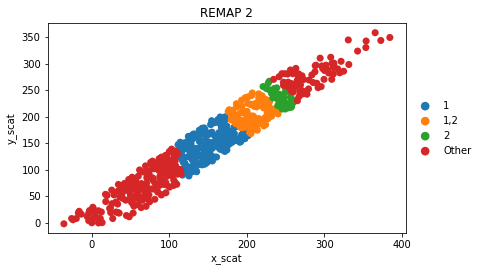

In [10]:
sc.pl.scatter(adata,"x_scat","y_scat",color='REMAP_2')

Lets use the selection from above and add an extra selection to it, using the load parameter. 

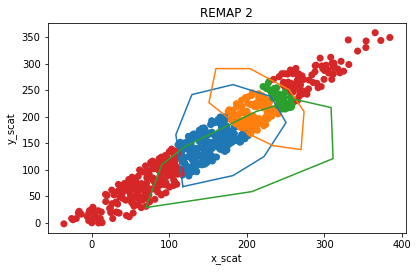

In [11]:
scS.pl.scatter(adata,"x_scat","y_scat",color='REMAP_2',load="REMAP_2",replot_lines="REMAP_2")


Revisualize using scanpy. Now we have an extra selection.

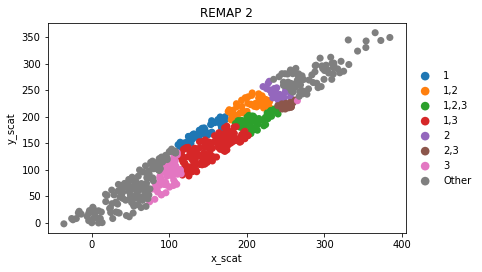

In [12]:
sc.pl.scatter(adata,"x_scat","y_scat",color='REMAP_2')

It is also possible to totally overwrite any existing cluster.

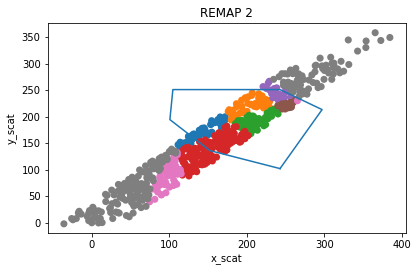

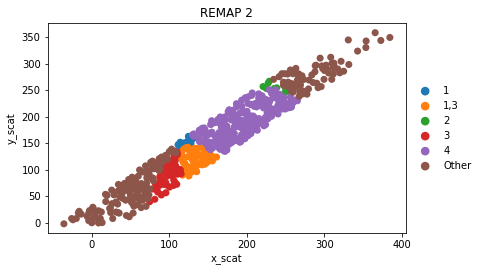

In [13]:

scS.pl.scatter(adata,"x_scat","y_scat",color='REMAP_2',load="REMAP_2",overwrite=True)
sc.pl.scatter(adata,"x_scat","y_scat",color='REMAP_2')

In [14]:
from scanpy.plotting import palettes
color_pal = palettes.vega_20
#color_pal = palettes.default_102


scSELpy is not made for more than one input for the color parameter. If this is done, the lines will always be shown on the right most plot. Example:

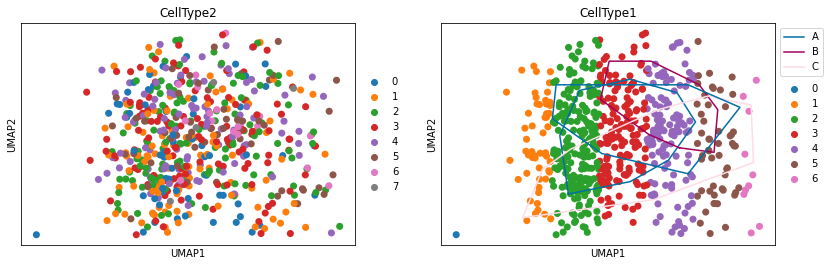

In [15]:
scS.pl.umap(adata,color=["CellType2","CellType1"],replot_lines="REMAP_2",line_palette=palettes.default_102[5:8],line_labels=["A","B","C"])


With line_palette, we can specify the colors of the lines

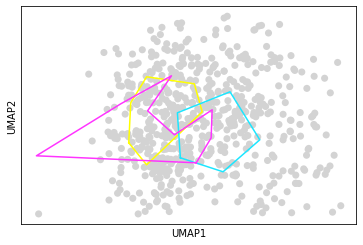

In [16]:
scS.pl.umap(adata,line_palette=palettes.default_102) 

We can also add a legend

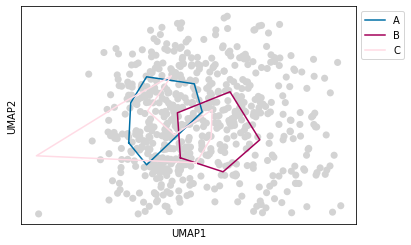

In [17]:
scS.pl.umap(adata,replot_lines="REMAP_3",line_palette=palettes.default_102[5:8],line_labels=["A","B","C"])

Or change the position of the legend

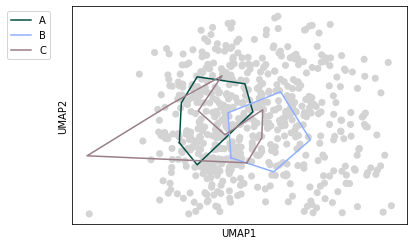

In [18]:
scS.pl.umap(adata,replot_lines="REMAP_3",line_palette=palettes.default_102[12:15],line_labels=["A","B","C"],line_loc='upper right',line_bbox_to_anchor=(-0.05,1))

Or not show all labels

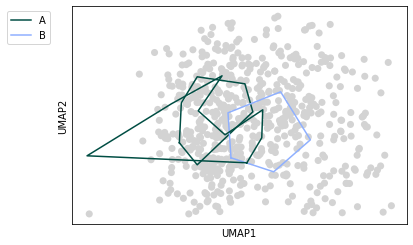

In [19]:
scS.pl.umap(adata,replot_lines="REMAP_3",line_palette=palettes.default_102[12:14],line_labels=["A","B","_nolegend_"],line_loc='upper right',line_bbox_to_anchor=(-0.05,1))


## Changing annotation names

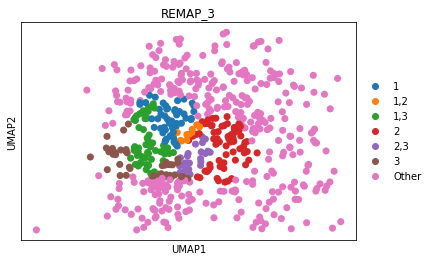

In [20]:
sc.pl.umap(adata,color="REMAP_3")

We are going to rename the annotations. Number 1 and 2 will be part of "gene A" and number 3 will be "gene B"
Lets generate a dictionary in which we can assign the names we want to replace for REMAP_3.

In [21]:
scS.annotate.gen_dict(adata.obs['REMAP_3'])

{'1': '1', '3': '3', '2': '2', 'Other': 'Other'}

Lets copy the dict above and rename:

In [22]:
input_dict = {'2': 'Gene B',
 '3': 'Gene A',
 'Other': 'Other',
 '1': 'Gene A'}

In [23]:
adata.obs['REMAP_3_renamed'] = scS.annotate.rename(adata.obs['REMAP_3'],input_dict)

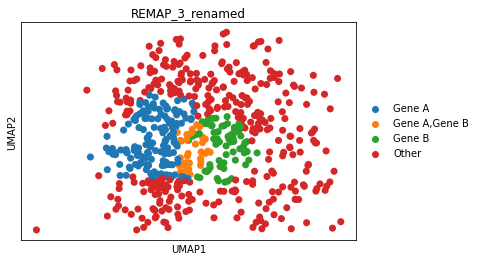

In [24]:
sc.pl.umap(adata,color="REMAP_3_renamed")

Now the annotations are renamed. 
If we would load REMAP_3_renamed and plot more lines, the reannotated names would not change. 
If we however used replot_lines parameter together with the load parameter, the old numeric names would reappear and be added to the new annotations. Please be aware of this.

## Selection tools

scSELpy has a function to:
1) calculate the % of cells in each selection 




In [25]:
scS.tl.cells_per_cluster(adata,"REMAP_3_renamed")

{'Other': 57.17, 'Gene A': 25.5, 'Gene B': 11.67, 'Gene A,Gene B': 5.67}

2) to calculate the % of cells expressing a certain gene in each selection 

In [26]:
scS.tl.cells_expressing_gene(adata,"REMAP_3_renamed","ENSG00000075624")

{'Gene A': 49.02, 'Gene A,Gene B': 50.0, 'Gene B': 58.57, 'Other': 46.36}

In the case that the gene name is not stored in anndata.var_names, but e.g. in ``anndata.var["Genes"]``, we can run: 

In [27]:
scS.tl.cells_expressing_gene(adata,"REMAP_3_renamed","ACTB",which_var="Genes")

{'Gene A': 49.02, 'Gene A,Gene B': 50.0, 'Gene B': 58.57, 'Other': 46.36}

3) Calculate the Transcripts per Million:

In [28]:
scS.tl.calculate_TPM(adata,"REMAP_3_renamed","ACTB",which_var="Genes",use_raw=False)

{'Gene A': 7.33, 'Gene A,Gene B': 6.2, 'Gene B': 11.82, 'Other': 6.87}

## Tips and tricks

If you do not want to store to REMAP_1, you can also create your own name.

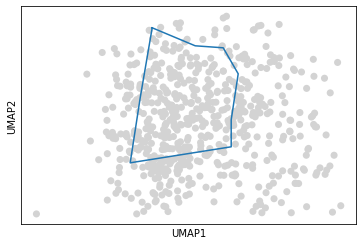

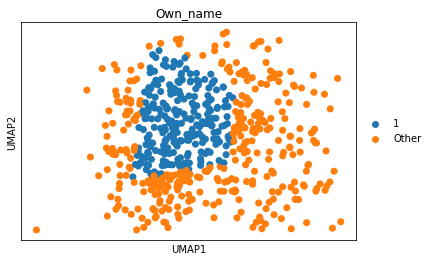

In [29]:
adata.obs['Own_name'] = ['Other']*len(adata.obs)
scS.pl.umap(adata,load="Own_name",printcords=True)
sc.pl.umap(adata,color="Own_name")

If you want to show a subcluster but not move the entire plot, you can draw a line around it and change the line_palette parameter to a color with a transparancy setting of 0, e.g. (0,0,0,0). 

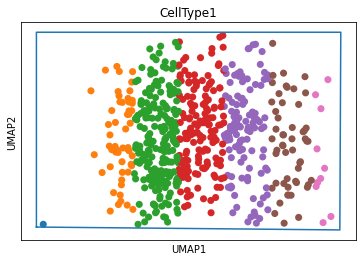

In [30]:
scS.pl.umap(adata,color='CellType1')

0


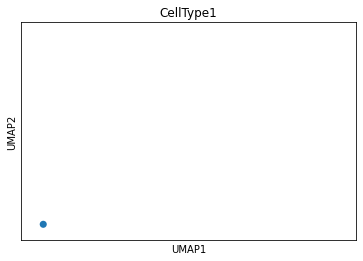

1


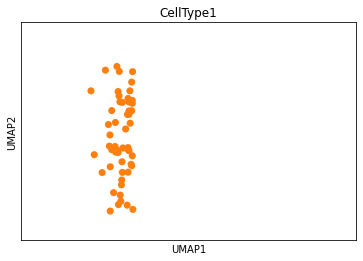

2


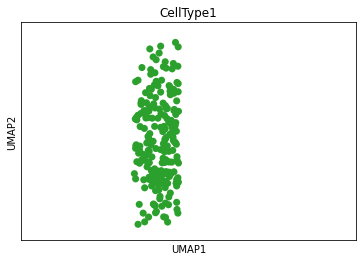

3


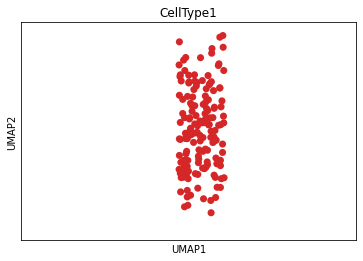

4


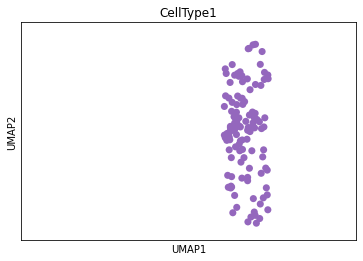

5


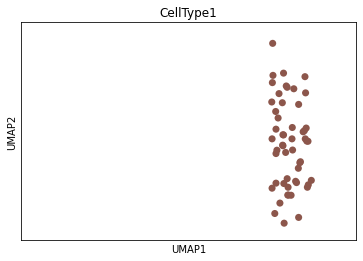

6


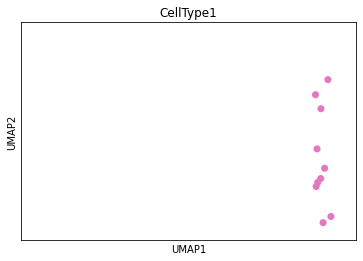

In [31]:
for ct in sorted(set(adata.obs['CellType1'])):
    print(ct)
    scS.pl.umap(adata[adata.obs['CellType1'] == ct],color="CellType1",replot_lines="REMAP_4",line_palette=[(0,0,0,0)],size=200)